# OTT 시장 분석

### 컴퓨터공학과 20학번 정소은

<p align="center"><img src="스크린샷 2021-12-20 오후 11.35.39.png" height="200px" width="400px"></p>

#### 밑의 표와 같이 글로벌 OTT매출액은 엄청난 속도로 발전해 오고 있다. 
#### 발전함에 따라 해당 플랫폼의 개수도 늘고 있다. 우리나라에도 웨이브, 왓챠, 티빙, 넷플릭스 등 다양한 플랫폼이 존재 한다.
#### 각 플랫폼이 가진 컨텐츠수는 다양하다. 사용자가 만족할만한 플랫폼을 장르, 언어 등 다양한 분야에서 분석해 보았다.

<p align="center"><img src="글로벌 .png" height="300px" width="500px"></p>

출처 : 소프트웨어 정책연구소 https://spri.kr/posts/view/22907?code=industry_trend

라이브러리 불러오기

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
plt.rc("font",family="AppleGothic")

In [121]:
Movie = pd.read_csv('Documents/MoviesOnStreamingPlatforms_updated.csv')

데이터 탐색

In [122]:
Movie.head(n=1)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0


In [123]:
Movie.shape

(9515, 17)

In [124]:
Movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9515 non-null   int64  
 1   ID               9515 non-null   int64  
 2   Title            9515 non-null   object 
 3   Year             9515 non-null   int64  
 4   Age              5338 non-null   object 
 5   IMDb             9309 non-null   object 
 6   Rotten Tomatoes  9508 non-null   object 
 7   Netflix          9515 non-null   int64  
 8   Hulu             9515 non-null   int64  
 9   Prime Video      9515 non-null   int64  
 10  Disney+          9515 non-null   int64  
 11  Type             9515 non-null   int64  
 12  Directors        9104 non-null   object 
 13  Genres           9399 non-null   object 
 14  Country          9261 non-null   object 
 15  Language         9202 non-null   object 
 16  Runtime          9196 non-null   float64
dtypes: float64(1),

### 데이터 전처리 과정
#### 해당 점수 지표에는 불필요한 String 문자와 공백을 제거하여 사용, numeric 값으로 바꿔준다.

In [125]:
Movie['Rotten Tomatoes'] = pd.to_numeric(Movie['Rotten Tomatoes'].str.replace("/100",""))

In [126]:
Movie['IMDb'] = pd.to_numeric(Movie['IMDb'].str.replace("/10",""))

#### 필요하지 않는 열을 제거한다.

In [127]:
Movie = Movie.drop(['Unnamed: 0'], axis = 1) 

In [128]:
Movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9515 non-null   int64  
 1   Title            9515 non-null   object 
 2   Year             9515 non-null   int64  
 3   Age              5338 non-null   object 
 4   IMDb             9309 non-null   float64
 5   Rotten Tomatoes  9508 non-null   float64
 6   Netflix          9515 non-null   int64  
 7   Hulu             9515 non-null   int64  
 8   Prime Video      9515 non-null   int64  
 9   Disney+          9515 non-null   int64  
 10  Type             9515 non-null   int64  
 11  Directors        9104 non-null   object 
 12  Genres           9399 non-null   object 
 13  Country          9261 non-null   object 
 14  Language         9202 non-null   object 
 15  Runtime          9196 non-null   float64
dtypes: float64(3), int64(7), object(6)
memory usage: 1.2+ MB


#### 각 플랫폼의 콘텐츠 비율

In [129]:
Count_M = []
for x in ['Netflix','Disney+','Hulu','Prime Video']:
    Count_M.append(Movie[x].sum(axis=0))

In [130]:
print(Count_M)

[3695, 922, 1047, 4113]


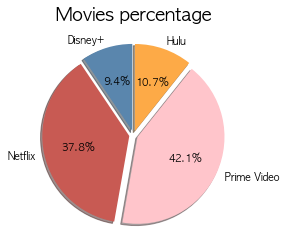

In [131]:
labels = ['Netflix','Disney+','Hulu','Prime Video']
explode = [0.05, 0.05,0.05,0.05]
colors = ['#C85A53', '#5A86AD','#FDAA47','#FFC5CB']

plt.pie(Count_M, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.title('Movies percentage',fontdict={ 'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.show()

### 데이터 전처리 과정
#### One-Hot Encoding : ,로 여러 장르와 언어로 나눠져 있어 먼저 해당 인코딩 방법으로 해당 값을 숫자로 바꿔준다. 

참고 : 강의 pdf

In [132]:
m_genres = Movie['Genres'].str.get_dummies(',')
m_lang = Movie['Language'].str.get_dummies(',')
m_contry = Movie['Country'].str.get_dummies(',')
M_g = pd.concat([Movie, m_genres], axis = 1, sort = False)
M_l = pd.concat([Movie, m_lang], axis = 1, sort = False)
M_c = pd.concat([Movie,m_contry], axis = 1, sort = False)
M_c.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+',
       ...
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay', 'Venezuela', 'Vietnam', 'West Germany', 'Yugoslavia',
       'Zimbabwe'],
      dtype='object', length=146)

### 플랫폼 별 어떤 장르가 많은가 - WordCloud


참고: https://blog.naver.com/PostView.naver?blogId=yejin7676&logNo=222024904782

In [133]:
!pip install WordCloud

In [134]:
from wordcloud import WordCloud

In [135]:
#One
def to_dict(df,x):
    df = df.loc[df[x] == 1]
    return df.iloc[:,16:].sum(axis=0).sort_values(ascending=False).to_dict()

In [136]:
from matplotlib import rc
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

<class 'numpy.ndarray'>
(650, 650, 3)


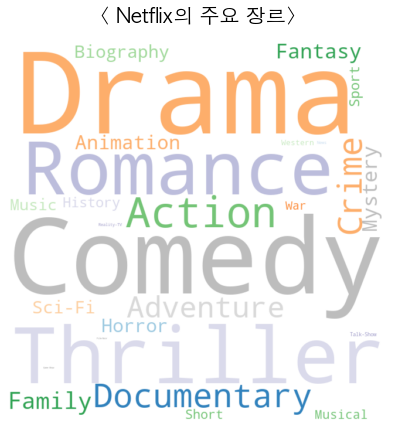

In [137]:
wordcloud = WordCloud(    
    background_color='white',                             
    colormap = 'tab20c',                                
    width = 650,
    height = 650
)
wordcloud_words = wordcloud.generate_from_frequencies(to_dict(M_g,'Netflix'))
array = wordcloud.to_array()
print(type(array))
print(array.shape) 

fig = plt.figure(figsize=(7, 7))
plt.imshow(array, interpolation="bilinear")
plt.rc('font', family='AppleGothic')
plt.title('< Netflix의 주요 장르>', fontsize = 20,pad=20)
plt.axis('off')
plt.show()

<class 'numpy.ndarray'>
(650, 650, 3)


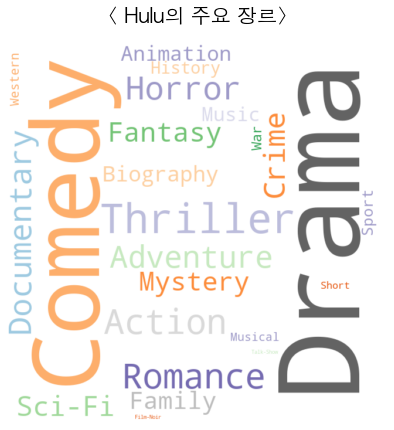

In [138]:
wordcloud = WordCloud(    
    background_color='white',                             
    colormap = 'tab20c',                                
    width = 650,
    height = 650
)
wordcloud_words = wordcloud.generate_from_frequencies(to_dict(M_g,'Hulu'))
array = wordcloud.to_array()
print(type(array))
print(array.shape) 

fig = plt.figure(figsize=(7, 7))
plt.imshow(array, interpolation="bilinear")
plt.rc('font', family='AppleGothic')
plt.title('< Hulu의 주요 장르>', fontsize = 20,pad=20)
plt.axis('off')
plt.show()

<class 'numpy.ndarray'>
(650, 650, 3)


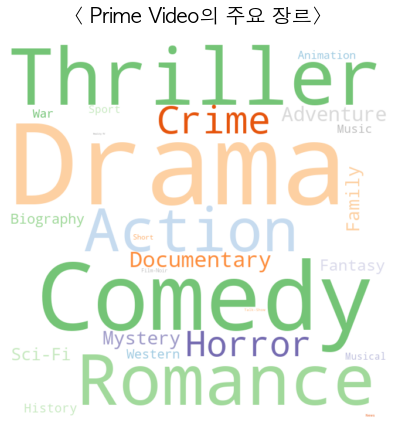

In [139]:
wordcloud = WordCloud(    
    background_color='white',                             
    colormap = 'tab20c',                                
    width = 650,
    height = 650
)
wordcloud_words = wordcloud.generate_from_frequencies(to_dict(M_g,'Prime Video'))
array = wordcloud.to_array()
print(type(array))
print(array.shape) 

fig = plt.figure(figsize=(7, 7))
plt.imshow(array, interpolation="bilinear")
plt.rc('font', family='AppleGothic')
plt.title('< Prime Video의 주요 장르>', fontsize = 20,pad=20)
plt.axis('off')
plt.show()

<class 'numpy.ndarray'>
(650, 650, 3)


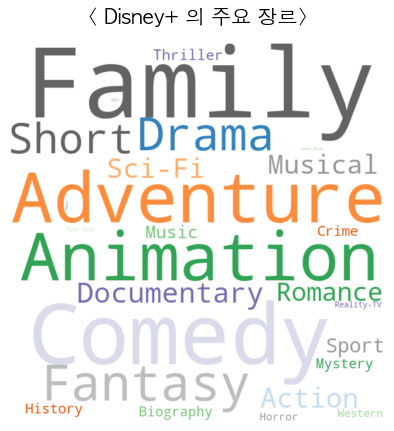

In [140]:
wordcloud = WordCloud(    
    background_color='white',                             
    colormap = 'tab20c',                                
    width = 650,
    height = 650
)
wordcloud_words = wordcloud.generate_from_frequencies(to_dict(M_g,'Disney+'))
array = wordcloud.to_array()
print(type(array))
print(array.shape) 

fig = plt.figure(figsize=(7, 7))
plt.imshow(array, interpolation="bilinear")
plt.rc('font', family='AppleGothic')
plt.title('< Disney+ 의 주요 장르>', fontsize = 20,pad=20)
plt.axis('off')
plt.show()

### 플랫폼 별 많이 쓰이는 언어

In [141]:
def Top10_Lang(x):
    N = pd.DataFrame({'lang' : to_dict(M_l,x).keys() , 'count' : to_dict(M_l,x).values() })
    N = N.sort_values('count',ascending=False)
    N = N.head(n=10)
    return N

Text(0.5, 1.0, 'The main language of Netflix')

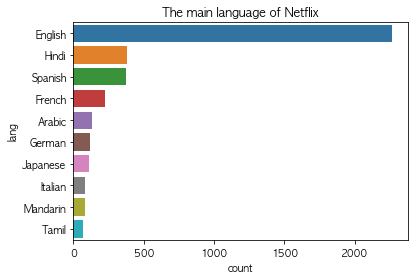

In [142]:
N_lang = Top10_Lang('Netflix')
ax = sns.barplot(x="count", y="lang", data=N_lang)
ax.set_title("The main language of Netflix")

Text(0.5, 1.0, 'The main language of Hulu')

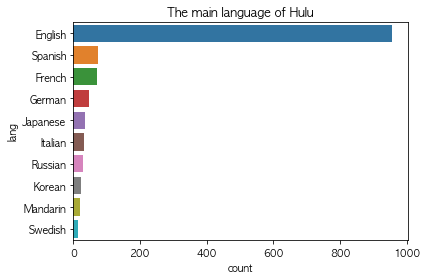

In [143]:
H_lang = Top10_Lang('Hulu')
ax = sns.barplot(x="count", y="lang", data=H_lang)
ax.set_title("The main language of Hulu")

Text(0.5, 1.0, 'The main language of Prime Video')

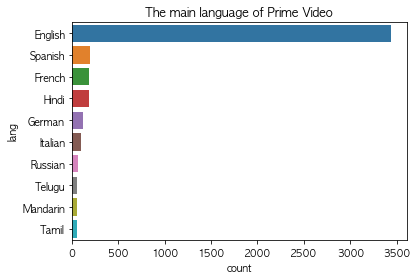

In [144]:
P_lang = Top10_Lang('Prime Video')
ax = sns.barplot(x="count", y="lang", data=P_lang)
ax.set_title("The main language of Prime Video")

Text(0.5, 1.0, 'The main language of Disney+')

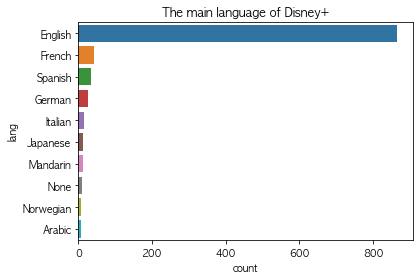

In [145]:
D_lang = Top10_Lang('Disney+')
ax = sns.barplot(x="count", y="lang", data=D_lang)
ax.set_title("The main language of Disney+")

별점 순서대로 나열 했을 때 가장 인기있고 좋은 것들은 어디있냐, 토마토랑 순위를 숫자의 형태로 바꾸어야한다. 

<AxesSubplot:xlabel='Rotten Tomatoes', ylabel='Count'>

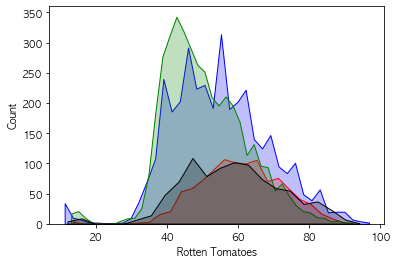

In [146]:
Movies = ['Netflix','Hulu','Prime Video','Disney+']
Colors = ['blue','red','green','black']
for M, C in zip(Movies,Colors):
    fig = sns.histplot(data=Movie.loc[Movie[M]==1], x="Rotten Tomatoes", element="poly",color = C,alpha=0.25)
fig

<AxesSubplot:xlabel='IMDb', ylabel='Count'>

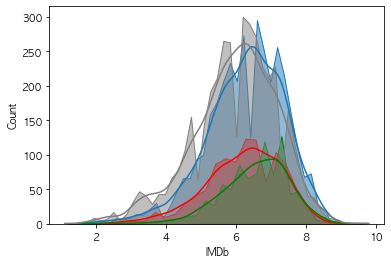

In [147]:
sns.histplot(data=Movie.loc[Movie['Netflix']==1], x="IMDb", kde=True, element="poly")
sns.histplot(data=Movie.loc[Movie['Hulu']==1], x="IMDb",kde=True, element="poly",color='red')
sns.histplot(data=Movie.loc[Movie['Disney+']==1], x="IMDb",kde=True, element="poly",color='green')
sns.histplot(data=Movie.loc[Movie['Prime Video']==1], x="IMDb",kde=True, element="poly",color='grey')

### Dash

In [148]:
!pip install dash
!pip install jupyter_dash

### 평가지수의 점수 분포도 - DashBoard
#### 원하는 평가 지수를 선택하고 플랫폼을 선택하면 해당 플랫폼의 평가점수 분포현황이 나타난다.
#### 이를 통하여 어떤 플랫폼이 더 나은 품질의 콘텐츠를 가지는가를 알 수 있다.

참고: 강의 노트 4주차 자료

In [153]:
import dash
from dash import html
import plotly.graph_objects as go
from dash import dcc
import plotly.express as px
from dash.dependencies import Input, Output

from jupyter_dash import JupyterDash

# Load Dash App
app = JupyterDash()

# Define App
app.layout = html.Div(children = [html.H1(id = 'H1', children = 'Ratings of Movies on Platforms',
                                          style = {'textAlign':'center',\
                                                   'marginTop':40,
                                                   'marginBottom':40}),
                                  dcc.Dropdown(id ='dropdown',
                                                options = [{'label':'Rotten Tomatoes','value':'Rotten Tomatoes'},
                                                           {'label':'IMDb','value':'IMDb'},],
                                                value='Rotten Tomatoes'),
                                  dcc.Dropdown(id = 'dropdown2',
                                                    options = [{'label':'Netflix','value':'Netflix'},
                                                               {'label':'Hulu','value':'Hulu'},
                                                               {'label':'Prime Video','value':'Prime Video'},
                                                                {'label':'Disney+','value':'Disney+'},],
                                                    value='Netflix'),
                                  dcc.Graph(id = 'plot')
                                  ])

# Define callback decorator and it's function    
@app.callback(Output("plot", "figure"),
              Input("dropdown","value"),
               Input("dropdown2","value"))

def graph_update(input1,input2):
    Colors = ['blue','red','green','black']
    for M, C in zip(Movies,Colors):
        fig = px.histogram(data_frame=Movie.loc[Movie[input2]==1], x=input1,opacity=0.75,title=input1+", "+input2)
        fig.update_layout(
              font=dict(
                size=15,
                color="black"
                )
        )
    return fig  

if __name__ == '__main__': 
    app.run_server(debug=True,port=8099)

Dash app running on http://127.0.0.1:8099/


<p align="center"><img src="dashboard.png" height="500px" width="800px"></p>

### 참고
##### https://seaborn.pydata.org/index.html# 
##### https://spri.kr/posts/view/22907?code=industry_trend
 ##### https://brunch.co.kr/@fiveio27/34
 ##### https://blog.naver.com/PostView.naver?blogId=yejin7676&logNo=222024904782
 ##### https://plotly.com/graphing-libraries/